### Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#delete column Id
df=df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#basic information about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#display species in the iris dataset
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Preprocessing dataset

In [7]:
#check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Exploratory Data Analysis

In [8]:
#displaying histogram

<Axes: >

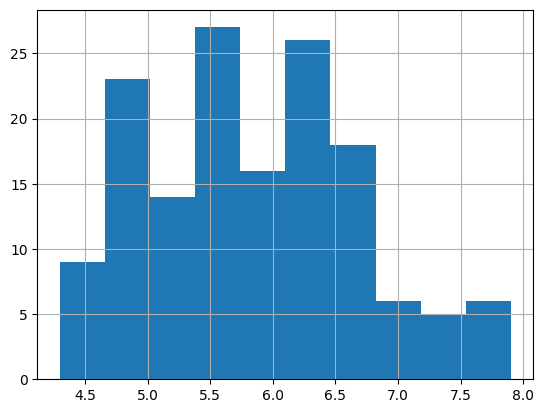

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

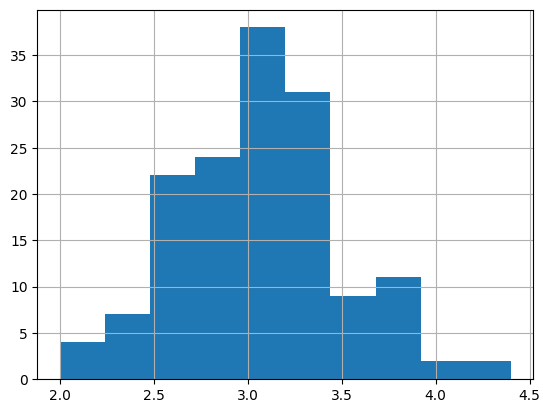

In [10]:
df['SepalWidthCm'].hist()

<Axes: >

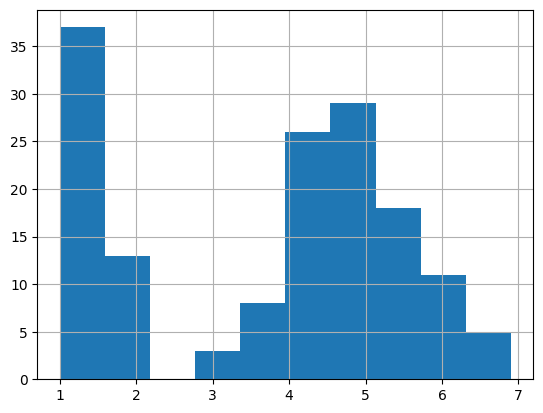

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

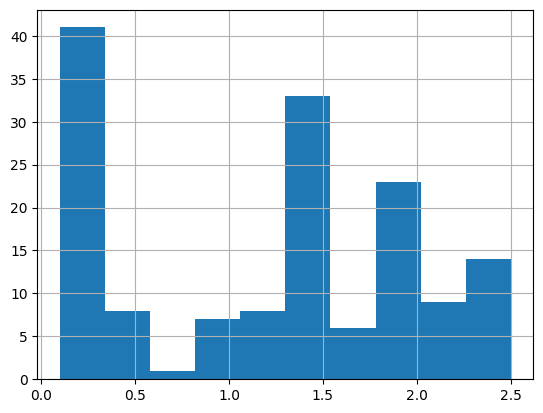

In [12]:
df['PetalWidthCm'].hist()

In [13]:
#displaying scatterplot

In [14]:
colors=['red', 'green', 'blue']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

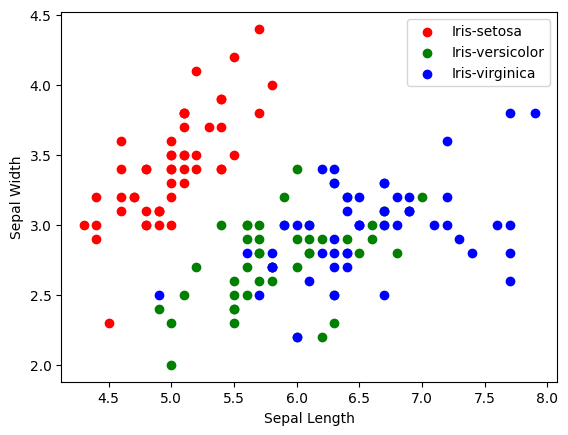

In [15]:
for x in range(3):
    y=df[df['Species']==species[x]]
    plt.scatter(y['SepalLengthCm'], y['SepalWidthCm'], c=colors[x], label=species[x])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

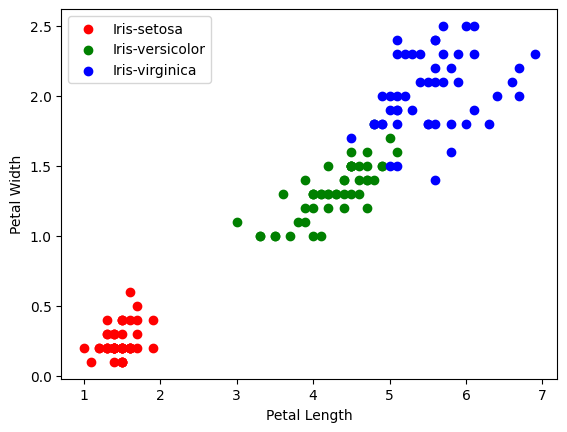

In [16]:
for x in range(3):
    y=df[df['Species']==species[x]]
    plt.scatter(y['PetalLengthCm'], y['PetalWidthCm'], c=colors[x], label=species[x])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

### Correlation matrix

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

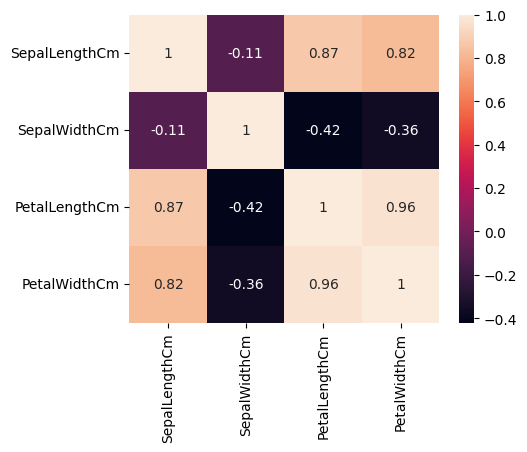

In [20]:
#heatmap
corr=df.corr()
fig, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

### Label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['Species']=le.fit_transform(df['Species'])

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [32]:
from sklearn.model_selection import train_test_split

#train - 70
#test - 30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [33]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [34]:
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
#print metrix to get performance
print("Accuracy", model.score(x_test, y_test))

Accuracy 0.9777777777777777


In [39]:
#k-nearest neighbour 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [40]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
#print metrix to get performance
print("Accuracy", model.score(x_test, y_test))

Accuracy 0.9777777777777777


In [42]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [43]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
#print metrix to get performance
print("Accuracy", model.score(x_test, y_test))

Accuracy 0.9111111111111111
